## Logistic function 

Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Define logistic function. Note that we do not vary the max point $1$ as we only are interested in binary classification encoded by $0,1$.

In [2]:
def logistic(x, beta_0, beta_1):
    return (np.exp(beta_1*x + beta_0))/(1+np.exp(beta_1*x + beta_0))

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def logistic2(x, beta_0, beta_1):
    return sigmoid(beta_1*x + beta_0)

Vary $\beta_1$

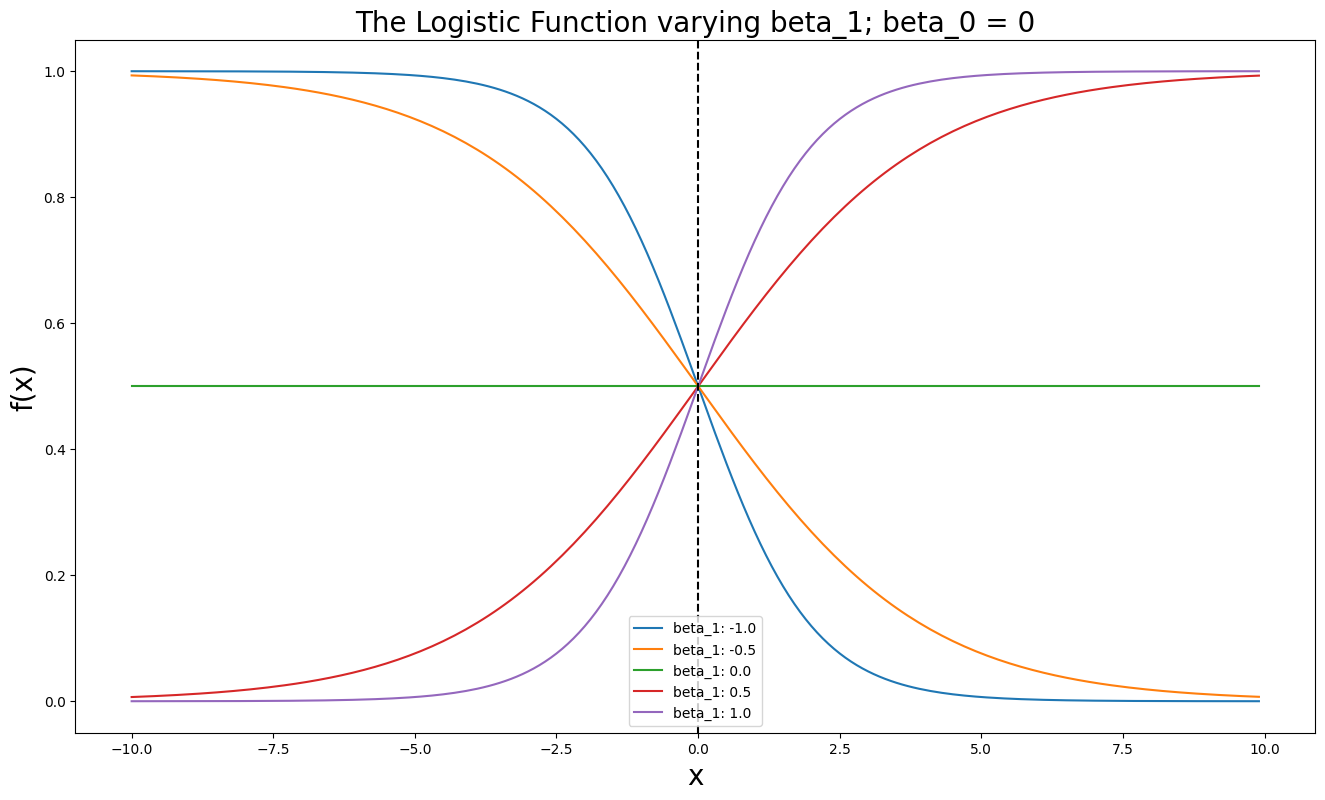

In [4]:
x = np.arange(start=-10, stop=10, step=0.1)  # an array from -10 to 10 with a step of 0.1

beta_0 = 0  # the midpoint of the S curve is 0

beta_1s = np.arange(start=-1, stop=1.1, step=0.5) # different steepness values to plot 

plt.figure(figsize=(16, 9))
for beta_1 in beta_1s:
    f_x = logistic2(x, beta_0, beta_1)
    plt.plot(x, f_x, label=f"beta_1: {beta_1}")

plt.axvline(x = 0, color = 'k', linestyle='--')
plt.title("The Logistic Function varying beta_1; beta_0 = 0", fontsize=20)
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.legend()
plt.show()

Vary $\beta_0$

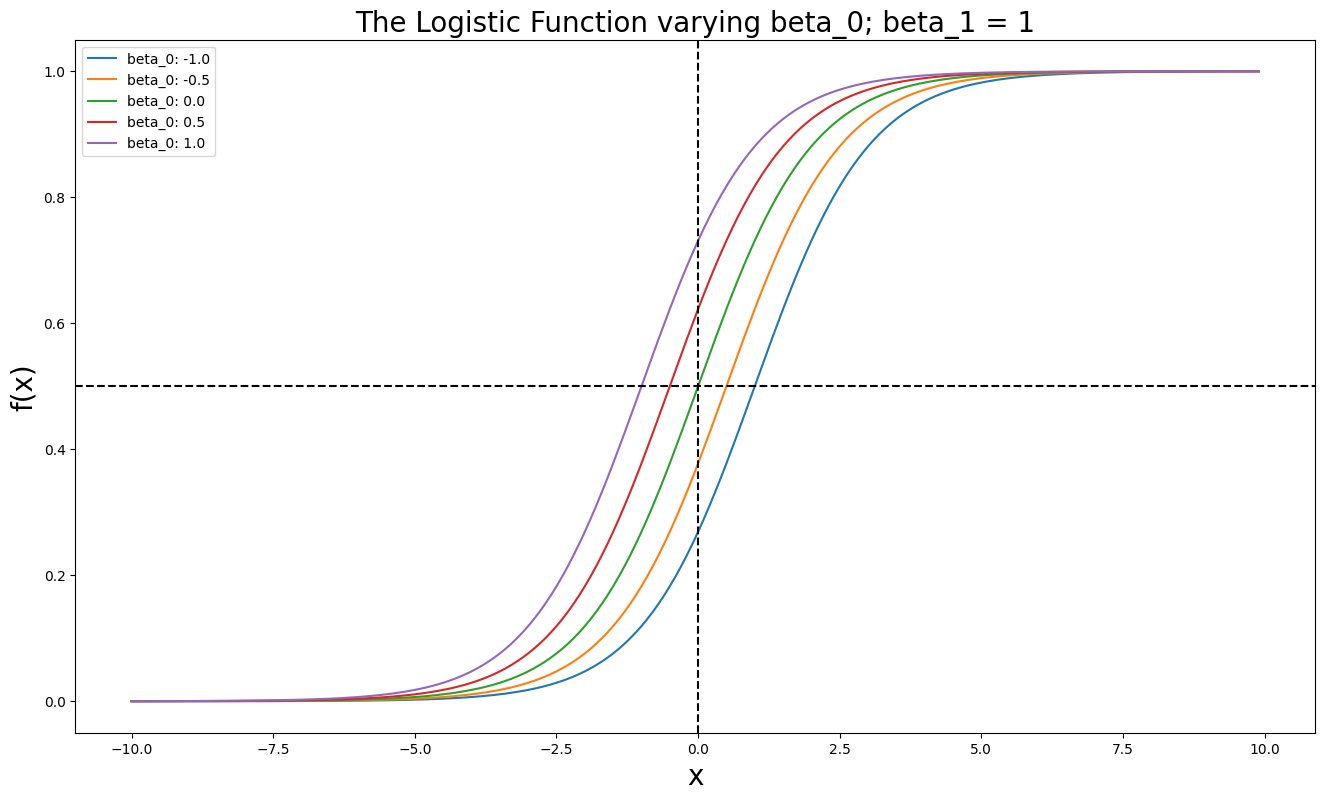

In [5]:
beta_1 = 1  # the steepness value is 1
beta_0s = np.arange(start=-1, stop=1.1, step=0.5) # different midpoint values to plot 

plt.figure(figsize=(16, 9))
for beta_0 in beta_0s:
    f_x = logistic2(x, beta_0, beta_1)
    plt.plot(x, f_x, label=f"beta_0: {beta_0}")

plt.axvline(x = 0, color = 'k', linestyle='--')
plt.axhline(y = 0.5, color = 'k', linestyle='--')
plt.title("The Logistic Function varying beta_0; beta_1 = 1", fontsize=20)
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.legend()
plt.show()

Load default Dataset

In [80]:
data= pd.read_csv("../ISLR/data/Default.csv")
data = data.drop(['Unnamed: 0'],axis=1)
default = data.loc[data['default'] == 'Yes'] 
nodefault = data.loc[data['default'] == 'No'] 
default

,default,student,balance,income
136,Yes,Yes,1486.998122,17854.397028
173,Yes,Yes,2205.799521,14271.492253
201,Yes,Yes,1774.694223,20359.506086
206,Yes,No,1889.599190,48956.171589
209,Yes,Yes,1899.390626,20655.200003
...,...,...,...,...
9912,Yes,No,2148.898454,44309.917173
9921,Yes,Yes,1627.898323,17546.997016
9949,Yes,No,1750.253150,51578.940163
9951,Yes,No,1515.606239,48688.512086


Create numpy arrays. Get size om minority class.

In [81]:
default_array = default[["balance"]].to_numpy()
nodefault_array = nodefault[["balance"]].to_numpy()
n_min = default_array.shape[0]

Create response array [0,1]. Normalize predictors between 0 and 1 (to avoid exp of too large numbers).

In [94]:
X = np.concatenate((default_array, nodefault_array)).reshape(-1)
y = np.concatenate((np.ones(default_array.shape[0]), np.zeros(nodefault_array.shape[0])))
X=X/max(X)

Default classificator's accuracy.

In [95]:
n_samples = X.shape[0]
1-n_min/n_samples

0.9667

Optionally, to test with aritificial data.

In [85]:
if False:
    X0 = np.arange(start=-10, stop=1.1, step=0.5)
    X1 = np.arange(start=-1.1, stop=10.1, step=0.5)
    X = np.concatenate((X0, X1))
    X.shape[0]
    y = np.concatenate((np.zeros(X0.shape[0]), np.ones(X1.shape[0])))
    y.shape[0]

Same size vectors of one predictor and one response variable.

In [99]:
print(X.shape, y.shape)

(10000,) (10000,)


Initial guess of parameters.

In [100]:
beta0 = 0
beta1 = 1

Predict function.

In [88]:
def predict(X, beta0, beta1):
    predictions = logistic2(X, beta0, beta1)
    class_predictions = [0 if y<=0.5 else 1 for y in predictions]
    res = np.asarray(class_predictions)
    return res

Accuracy function.

In [89]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/y_test.shape[0]

acc = accuracy(predict(X, beta0, beta1), y)
print(acc)

0.0832


Plot data and logistic regression function. 

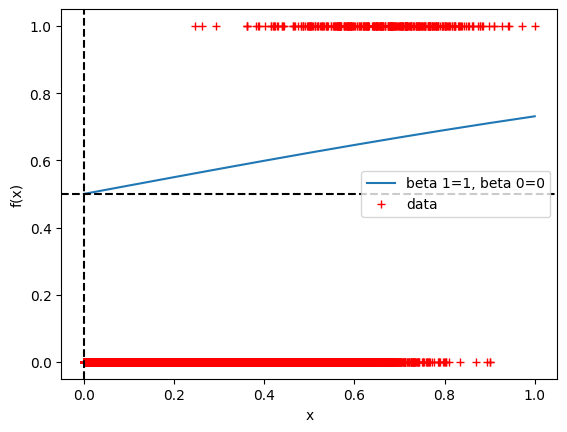

In [90]:
def plot(X, y, beta0, beta1):
    x_min = np.min(X)
    x_max = np.max(X)
    x = np.arange(start=x_min, stop=x_max+0.1, step=0.1)
    f_x = logistic2(x, beta0, beta1)
    plt.plot(x, f_x, label=f"beta 1={beta1}, beta 0={beta0}")
    plt.plot(X, y, 'r+', label=f"data")
    plt.axvline(x = 0, color = 'k', linestyle='--')
    plt.axhline(y = 0.5, color = 'k', linestyle='--')
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.legend()
    plt.show()

plot(X, y, beta0, beta1)

Log likelihood function.

In [91]:
def log_likelihood(X, y, beta0, beta1):
    linear_pred = (beta1*X + beta0)
    return np.dot(y.T, linear_pred) - np.sum(np.log(1+np.exp(linear_pred)))
    
ll = log_likelihood(X, y, 0, 10)
print(ll)

-30559.357423140238


Learning rate and iterations.

In [92]:
lr = 0.0001
n_iters = 100000

Gradient ascent.

In [93]:
accs = []
lls = []
for _ in range(n_iters):
    #linear_pred = beta1*X + beta0
    #predictions = sigmoid(linear_pred)
    predictions = logistic2(X, beta0, beta1)
    db1 = np.dot(X.T, (y - predictions))
    db0 = np.sum(y - predictions)
    acc = accuracy(predict(X, beta0, beta1), y)
    ll = log_likelihood(X, y,  beta0, beta1)
    accs.append(acc)    
    lls.append(ll)    
    beta1 = beta1 + lr*db1
    beta0 = beta0 + lr*db0

Results.

-10.651330619040321 14.595899362275675 0.9725


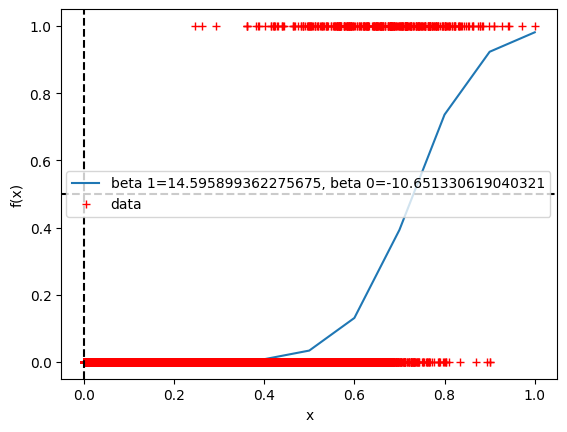

In [96]:
acc = accuracy(predict(X, beta0, beta1), y)
print(beta0, beta1, acc)
plot(X, y, beta0, beta1)

Learning histories (accuracy and log likelihood).

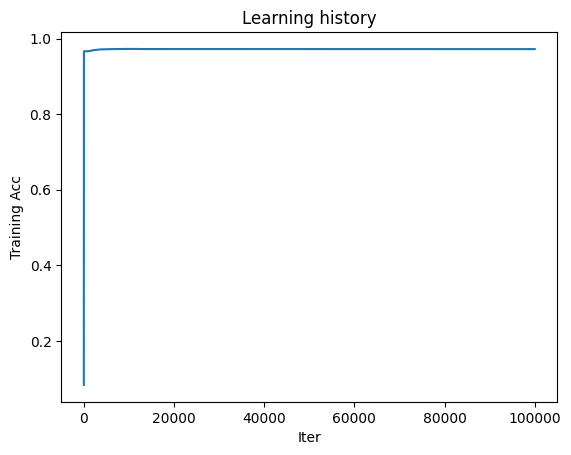

In [97]:
plt.plot(range(0,n_iters), accs)
plt.title("Learning history")
plt.ylabel("Training Acc")
plt.xlabel("Iter")
plt.show()

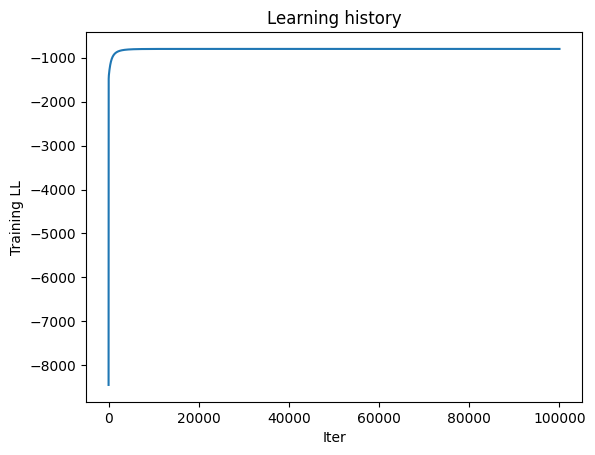

In [98]:
plt.plot(range(0,n_iters), lls)
plt.title("Learning history")
plt.ylabel("Training LL")
plt.xlabel("Iter")
plt.show()